# Improved Clustering

## Load Data:

In [1]:
import pickle

df_covid = pickle.load(open("plot_data/df_covid_new.p", "rb"))
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26043 entries, 0 to 27677
Data columns (total 13 columns):
paper_id               26043 non-null object
abstract               26043 non-null object
body_text              26043 non-null object
authors                26043 non-null object
title                  26043 non-null object
journal                26043 non-null object
abstract_summary       26043 non-null object
abstract_word_count    26043 non-null int64
body_word_count        26043 non-null int64
body_text_clean        26043 non-null object
abstract_clean         26043 non-null object
processed_text         26043 non-null object
language               26043 non-null object
dtypes: int64(2), object(11)
memory usage: 2.8+ MB


Get the English articles only.

In [2]:
df_covid = df_covid.loc[df_covid['language'] == 'en']

In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24934 entries, 0 to 27677
Data columns (total 13 columns):
paper_id               24934 non-null object
abstract               24934 non-null object
body_text              24934 non-null object
authors                24934 non-null object
title                  24934 non-null object
journal                24934 non-null object
abstract_summary       24934 non-null object
abstract_word_count    24934 non-null int64
body_word_count        24934 non-null int64
body_text_clean        24934 non-null object
abstract_clean         24934 non-null object
processed_text         24934 non-null object
language               24934 non-null object
dtypes: int64(2), object(11)
memory usage: 2.7+ MB


## Vectorize

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2**11)
X = vectorizer.fit_transform(df_covid['processed_text'].values)

In [5]:
X.shape

(24934, 2048)

## Dimensionality Reduction

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=30.0, early_exaggeration=12.0, 
            learning_rate=200.0, n_iter=1000, 
            n_iter_without_progress=300, 
            min_grad_norm=1e-07, 
            metric='euclidean', 
            init='random',
            random_state=42, 
            method='barnes_hut', 
            angle=0.5)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 24934 samples in 6.735s...
[t-SNE] Computed neighbors for 24934 samples in 1962.671s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24934
[t-SNE] Computed conditional probabilities for sample 2000 / 24934
[t-SNE] Computed conditional probabilities for sample 3000 / 24934
[t-SNE] Computed conditional probabilities for sample 4000 / 24934
[t-SNE] Computed conditional probabilities for sample 5000 / 24934
[t-SNE] Computed conditional probabilities for sample 6000 / 24934
[t-SNE] Computed conditional probabilities for sample 7000 / 24934
[t-SNE] Computed conditional probabilities for sample 8000 / 24934
[t-SNE] Computed conditional probabilities for sample 9000 / 24934
[t-SNE] Computed conditional probabilities for sample 10000 / 24934
[t-SNE] Computed conditional probabilities for sample 11000 / 24934
[t-SNE] Computed conditional probabilities for sample 12000 / 24934
[t-SNE] Computed conditional probabilities for 

## Get the Labels for the Plot

In [7]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X_embedded)

In [8]:
k = 20
kmeans_withX = MiniBatchKMeans(n_clusters=k)
y_pred_withX = kmeans_withX.fit_predict(X)

## Save

In [9]:
import pickle

# save the final t-SNE
pickle.dump(X_embedded, open("plot_data/X_embedded_new.p", "wb" ))

# save the labels generate with k-means(20)
pickle.dump(y_pred, open("plot_data/y_pred_new.p", "wb" ))

# save the labels generate with k-means(20) with X
pickle.dump(y_pred_withX, open("plot_data/y_pred_withX_new.p", "wb" ))

## Plot

### t-SNE Output Clustered For Visualization

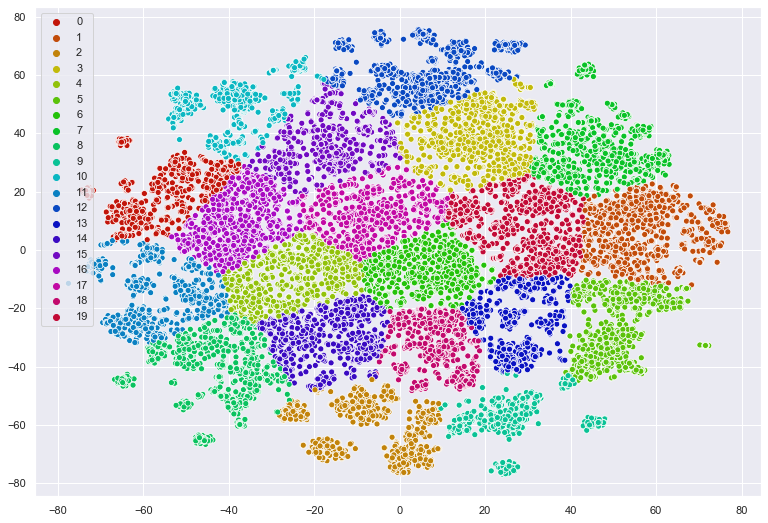

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.savefig("plots/improved_cluster_tsne.png")
plt.show()

### X Clustered - More Accurate

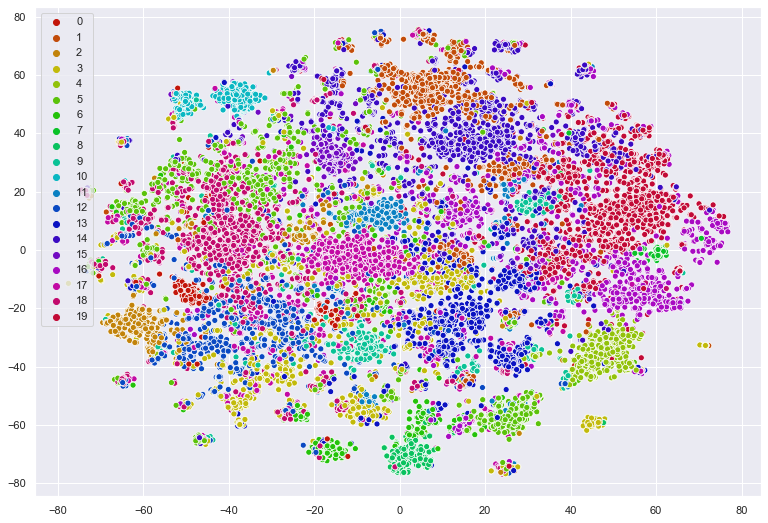

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred_withX, legend='full', palette=palette)
plt.savefig("plots/improved_cluster_X.png")
plt.show()